# IPL Score Prediction

#### Importing Necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("data.csv")

In [6]:
print(df)

       mid        date                                      venue  \
0        1  2008-04-18                      M Chinnaswamy Stadium   
1        1  2008-04-18                      M Chinnaswamy Stadium   
2        1  2008-04-18                      M Chinnaswamy Stadium   
3        1  2008-04-18                      M Chinnaswamy Stadium   
4        1  2008-04-18                      M Chinnaswamy Stadium   
...    ...         ...                                        ...   
76009  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76010  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76011  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76012  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76013  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   

                batting_team                 bowling_team      batsman  \
0      Kolkata Knight Riders  Royal Challengers Bangalore   SC Ganguly   
1      Kolkata Knight R

### Data Analysis

In [7]:
df.head()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [8]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   batting_team    76014 non-null  object 
 4   bowling_team    76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [10]:
df.nunique()

mid               617
date              442
venue              35
batting_team       14
bowling_team       14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

In [11]:
df.dtypes

mid                 int64
date               object
venue              object
batting_team       object
bowling_team       object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

### Data Cleaning

In [12]:
df.columns

Index(['mid', 'date', 'venue', 'batting_team', 'bowling_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')

In [13]:
df=df.drop(['mid','date','venue','batsman','bowler','striker', 'non-striker'],axis=1)

In [14]:
df.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [15]:
current_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [16]:
current_teams

['Kolkata Knight Riders',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Mumbai Indians',
 'Kings XI Punjab',
 'Royal Challengers Bangalore',
 'Delhi Daredevils',
 'Sunrisers Hyderabad']

In [17]:
df=df[(df['batting_team'].isin (current_teams))&(df['bowling_team'].isin(current_teams))]

In [18]:
df

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...
75884,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


In [19]:
df.shape

(53811, 8)

In [20]:
df[df['overs']>=5.0]

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...
75884,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


In [21]:
data=pd.get_dummies(data=df,columns=['batting_team','bowling_team'])

In [22]:
data

,runs,wickets,overs,runs_last_5,wickets_last_5,total,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,...,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
0,1,0,0.1,1,0,222,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0.2,1,0,222,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,2,0,0.2,2,0,222,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,2,0,0.3,2,0,222,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,2,0,0.4,2,0,222,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,106,9,18.1,29,4,107,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
75885,107,9,18.2,29,4,107,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
75886,107,9,18.3,28,4,107,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
75887,107,9,18.4,24,4,107,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [23]:
x=data.drop(['total'],axis=1)

In [24]:
x

,runs,wickets,overs,runs_last_5,wickets_last_5,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,...,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
0,1,0,0.1,1,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0.2,1,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,2,0,0.2,2,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,2,0,0.3,2,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,2,0,0.4,2,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,106,9,18.1,29,4,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
75885,107,9,18.2,29,4,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
75886,107,9,18.3,28,4,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
75887,107,9,18.4,24,4,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [25]:
y=df['total']

In [26]:
y

0        222
1        222
2        222
3        222
4        222
        ... 
75884    107
75885    107
75886    107
75887    107
75888    107
Name: total, Length: 53811, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,shuffle=True)

In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_x,train_y)
model.score(test_x,test_y)

0.5222082194253761

In [29]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(train_x,train_y)
tree.score(test_x,test_y)

0.6583371397365241

In [30]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(train_x,train_y)
svm.score(test_x,test_y)

0.4578037783787826

In [31]:
from sklearn.linear_model import LassoCV
lasso=LassoCV()
lasso.fit(train_x,train_y)
lasso.score(test_x,test_y)

0.5139881488844104

In [32]:
from sklearn.neural_network import MLPRegressor
neural=MLPRegressor(activation='logistic',max_iter=500)
neural.fit(train_x,train_y)
neural.score(test_x,test_y)

0.7126771873737668

In [33]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(train_x,train_y)
forest.score(test_x,test_y)
prediction=forest.predict(test_x)
prediction

array([120.        , 182.34      , 187.01892857, ..., 212.12      ,
       163.4175    , 172.4       ])

In [34]:
test_y


37347    120
64908    186
20582    184
65454    185
43886    136
        ... 
69852    148
6360     145
10082    211
57230    209
55929    184
Name: total, Length: 10763, dtype: int64

<Axes: xlabel='total', ylabel='Density'>

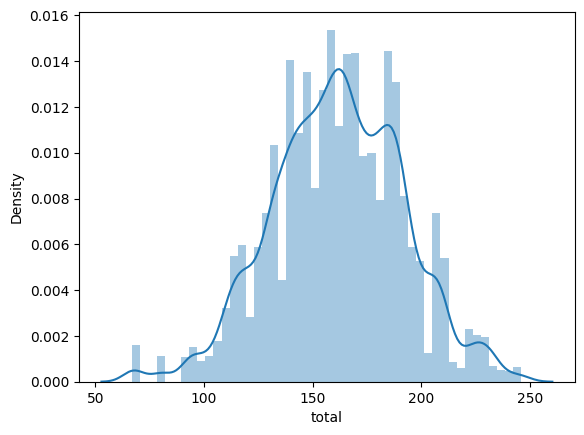

In [35]:
import seaborn as sns
sns.distplot(test_y)

In [36]:
from sklearn import metrics


In [37]:
print("MAE :",metrics.mean_absolute_error(test_y,prediction))

MAE : 7.369740159723621


In [38]:
print("MSE :",metrics.mean_squared_error(test_y,prediction))

MSE : 186.64022176026992


In [39]:
print("RMSE :",metrics.root_mean_squared_error(test_y,prediction))

RMSE : 13.661633202522674


In [43]:
file_name="ipl_score_prediction.pkl"

In [44]:
import pickle
pickle.dump(forest,open(file_name,'wb'))